# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [3]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [4]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [5]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [6]:
class Graph(Digraph):    
    def addEdge(self, edge):        
        Digraph.addEdge(self, edge)        
        rev = Edge(edge.getDestination(), edge.getSource())        
        Digraph.addEdge(self, rev)

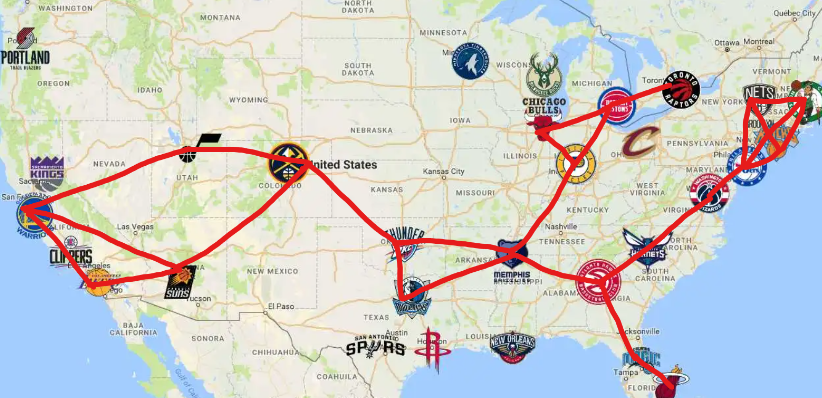

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [7]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('California', 'Los Angeles', 'Phoenix', 'Arizona', 'Utah', 'Colorado', 'Oklahoma', 'Dallas', 'Memphis', 'Indiana', 'Chicago', 'Detroit','Toronto', 'Atlanta', 'Orlando', 'Miami', 'Washington',
                 'Philadelphia', 'New York', 'Brooklyn', 'Boston'):
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('California'), g.getNode('Los Angeles')))
    g.addEdge(Edge(g.getNode('California'), g.getNode('Arizona')))
    g.addEdge(Edge(g.getNode('California'), g.getNode('Utah')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Arizona')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('California')))
    g.addEdge(Edge(g.getNode('Arizona'), g.getNode('California')))
    g.addEdge(Edge(g.getNode('Arizona'), g.getNode('Los Angeles')))
    g.addEdge(Edge(g.getNode('Arizona'), g.getNode('Colorado')))
    g.addEdge(Edge(g.getNode('Utah'), g.getNode('California')))
    g.addEdge(Edge(g.getNode('Utah'), g.getNode('Colorado')))
    g.addEdge(Edge(g.getNode('Colorado'), g.getNode('Utah')))
    g.addEdge(Edge(g.getNode('Colorado'), g.getNode('Oklahoma')))
    g.addEdge(Edge(g.getNode('Colorado'), g.getNode('Arizona')))
    g.addEdge(Edge(g.getNode('Oklahoma'), g.getNode('Colorado')))
    g.addEdge(Edge(g.getNode('Oklahoma'), g.getNode('Dallas')))
    g.addEdge(Edge(g.getNode('Oklahoma'), g.getNode('Memphis')))
    g.addEdge(Edge(g.getNode('Dallas'), g.getNode('Oklahoma')))
    g.addEdge(Edge(g.getNode('Dallas'), g.getNode('Memphis')))
    g.addEdge(Edge(g.getNode('Memphis'), g.getNode('Oklahoma')))
    g.addEdge(Edge(g.getNode('Memphis'), g.getNode('Dallas')))
    g.addEdge(Edge(g.getNode('Memphis'), g.getNode('Indiana')))
    g.addEdge(Edge(g.getNode('Memphis'), g.getNode('Atlanta')))
    g.addEdge(Edge(g.getNode('Indiana'), g.getNode('Memphis')))
    g.addEdge(Edge(g.getNode('Indiana'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Indiana'), g.getNode('Detroit')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Indiana')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Detroit')))
    g.addEdge(Edge(g.getNode('Detroit'), g.getNode('Indiana')))
    g.addEdge(Edge(g.getNode('Detroit'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Detroit'), g.getNode('Toronto')))
    g.addEdge(Edge(g.getNode('Toronto'), g.getNode('Detroit')))
    g.addEdge(Edge(g.getNode('Atlanta'), g.getNode('Memphis')))
    g.addEdge(Edge(g.getNode('Atlanta'), g.getNode('Washington')))
    g.addEdge(Edge(g.getNode('Atlanta'), g.getNode('Orlando')))
    g.addEdge(Edge(g.getNode('Orlando'), g.getNode('Atlanta')))
    g.addEdge(Edge(g.getNode('Orlando'), g.getNode('Miami')))
    g.addEdge(Edge(g.getNode('Miami'), g.getNode('Orlando')))
    g.addEdge(Edge(g.getNode('Washington'), g.getNode('Atlanta')))
    g.addEdge(Edge(g.getNode('Washington'), g.getNode('Philadelphia')))
    g.addEdge(Edge(g.getNode('Philadelphia'), g.getNode('Washington')))
    g.addEdge(Edge(g.getNode('Philadelphia'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Philadelphia'), g.getNode('Brooklyn')))
    g.addEdge(Edge(g.getNode('Philadelphia'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Philadelphia')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Brooklyn')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Brooklyn'), g.getNode('Philadelphia')))
    g.addEdge(Edge(g.getNode('Brooklyn'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Brooklyn'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Philadelphia')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Brooklyn')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    return g


In [8]:
def printPath(path):    
    """Assumes path is a list of nodes"""    
    result = ''    
    for i in range(len(path)):        
        result = result + str(path[i])        
        if i != len(path) - 1:            
            result = result + '->'    
    return result

6. Create a method to define DFS technique

In [9]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [10]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [11]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [12]:
testSP('Boston', 'Phoenix')

Current DFS path: Boston
Current DFS path: Boston->Philadelphia
Current DFS path: Boston->Philadelphia->Washington
Current DFS path: Boston->Philadelphia->Washington->Atlanta
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis->Oklahoma
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis->Oklahoma->Colorado
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis->Oklahoma->Colorado->Utah
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis->Oklahoma->Colorado->Utah->California
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis->Oklahoma->Colorado->Utah->California->Los Angeles
Current DFS path: Boston->Philadelphia->Washington->Atlanta->Memphis->Oklahoma->Colorado->Utah->California->Los Angeles->Arizona
Already visited California
Already visited Los Angeles
Already visited Colorado
Already visited California
Current DFS path: Boston->Phil

##### Question: 
    
Describe the DFS method to compute for the shortest path using the given sample codes

I'd describe the DFS method as the 'tunnel-vision' method because the way it traverses things on the graph is as if it has tunnel-vision issues where it travels a node and fully commits to it until it reaches a dead end. It backtracks once it fully discovers the depth of a path by one.

10. Create a method to define BFS technique

In [13]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [14]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [15]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Philadelphia
Current BFS path: Boston->Brooklyn
Current BFS path: Boston->New York
Current BFS path: Boston->Philadelphia->Washington
Current BFS path: Boston->Philadelphia->New York
Current BFS path: Boston->Philadelphia->Brooklyn
Current BFS path: Boston->Brooklyn->Philadelphia
Current BFS path: Boston->Brooklyn->New York
Current BFS path: Boston->New York->Philadelphia
Current BFS path: Boston->New York->Brooklyn
Current BFS path: Boston->Philadelphia->Washington->Atlanta
Current BFS path: Boston->Philadelphia->New York->Brooklyn
Current BFS path: Boston->Philadelphia->Brooklyn->New York
Current BFS path: Boston->Brooklyn->Philadelphia->Washington
Current BFS path: Boston->Brooklyn->Philadelphia->New York
Current BFS path: Boston->Brooklyn->New York->Philadelphia
Current BFS path: Boston->New York->Philadelphia->Washington
Current BFS path: Boston->New York->Philadelphia->Brooklyn
Current BFS path: Boston->New York->Brooklyn->Philad

I'd describe the BFS method as the 'AoE' method because the way it traverses things on the graph is as if it has tunnel-vision issues where it travels a node and fully commits to it until it reaches a dead end. It backtracks once it fully discovers the depth of a path by one.

#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

In [16]:
# type your code here using DFS
# routes to TIP from Home (Timog Ave) to TIP QC

def myRoutes(graphType):    
    g = graphType()    
    for name in ('Home','Timog Ave','E-ROD/New Manila','Anonas','TIP','Araneta','Angkas','Taxi','Grab'): 
        #Create 7 nodes        
        g.addNode(Node(name))    
    g.addEdge(Edge(g.getNode('Home'), g.getNode('Timog Ave')))       
    g.addEdge(Edge(g.getNode('Timog Ave'), g.getNode('E-ROD/New Manila'))) 
    g.addEdge(Edge(g.getNode('E-ROD/New Manila'), g.getNode('Araneta')))        
    g.addEdge(Edge(g.getNode('Araneta'), g.getNode('TIP')))
    g.addEdge(Edge(g.getNode('Timog Ave'), g.getNode('Anonas')))    
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('TIP')))
    g.addEdge(Edge(g.getNode('Timog Ave'), g.getNode('Taxi')))       
    g.addEdge(Edge(g.getNode('Taxi'), g.getNode('TIP'))) 
    g.addEdge(Edge(g.getNode('Home'), g.getNode('Grab')))        
    g.addEdge(Edge(g.getNode('Grab'), g.getNode('TIP')))
    g.addEdge(Edge(g.getNode('Home'), g.getNode('Angkas')))    
    g.addEdge(Edge(g.getNode('Angkas'), g.getNode('TIP'))) 
                 
    return g
    
def shortestPath_DFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)



def testSP_DFS(source, destination):
    g = myRoutes(Digraph)
    sp = shortestPath_DFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)    



In [17]:
testSP_DFS('Home', 'TIP')  

Current DFS path: Home
Current DFS path: Home->Timog Ave
Current DFS path: Home->Timog Ave->E-ROD/New Manila
Current DFS path: Home->Timog Ave->E-ROD/New Manila->Araneta
Current DFS path: Home->Timog Ave->E-ROD/New Manila->Araneta->TIP
Current DFS path: Home->Timog Ave->Anonas
Current DFS path: Home->Timog Ave->Anonas->TIP
Current DFS path: Home->Timog Ave->Taxi
Current DFS path: Home->Timog Ave->Taxi->TIP
Current DFS path: Home->Grab
Current DFS path: Home->Grab->TIP
Current DFS path: Home->Angkas
Current DFS path: Home->Angkas->TIP
Shortest path from Home to TIP is Home->Angkas->TIP


In [20]:
# type your code here using BFS
def shortestPath_BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

def testSP_BFS(source, destination):
    g = myRoutes(Digraph)
    sp = shortestPath_BFS(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)    

In [22]:
testSP_BFS('Home', 'TIP')

Current BFS path: Home
Current BFS path: Home->Timog Ave
Current BFS path: Home->Grab
Current BFS path: Home->Angkas
Current BFS path: Home->Timog Ave->E-ROD/New Manila
Current BFS path: Home->Timog Ave->Anonas
Current BFS path: Home->Timog Ave->Taxi
Current BFS path: Home->Grab->TIP
Shortest path from Home to TIP is Home->Grab->TIP


DFS and BFS produced different paths from Home to TIP despite both having routes of the same length due to their different traversal strategies. DFS prioritizes depth, exploring each path as deeply as possible before backtracking, which led it to find the *Home -> Angkas -> TIP* route after exploring all paths. In contrast, BFS prioritizes breadth, exploring all nodes at the current depth level before moving deeper, resulting in the *Home -> Grab -> TIP* route being found first. This difference in exploration order explains why BFS found *Grab -> TIP first*, as it checks all immediate neighbors before proceeding to the next level. Hence, the discrepancy arises from the inherent nature of DFS to dive deep first and BFS to cover wide first, affecting which complete path each algorithm encounters initially. With the nature of their traversal, one can deduct that a BFS algorithm uses a queue while a DFS uses a stack.








#### Conclusion

This activity explored Graph Theory applied in python as well as applying the DFS and BFS algorithm with it. It also explored the differences between the two algorithms.